In [1]:
import pandas as pd
import numpy as np

years = np.array(['1953-54', '1954-55', '1955-56', '1956-57', '1957-58', '1958-59'])

first_quarter = np.array([3575, 3867, 4669, 4693, 5518, 6523])
second_quarter = np.array([4342, 4404, 5327, 5640, 6887, 9808])
third_quarter = np.array([4435, 5726, 5811, 5957, 7782, 10149])
fourth_quarter = np.array([10191, 9816, 10350, 12961, 19718, 25510])

expenditure_dictionary = {
    'Years' : years,
    'Apr - Jun' : first_quarter,
    'Jul - Sep' : second_quarter,
    'Oct - Dec' : third_quarter,
    'Jan - Mar' : fourth_quarter
}

expenditure_dataframe = pd.DataFrame(expenditure_dictionary)

#### The data related to the revenue expenditure, Goverment of India, during the years 1953-54 to 1958-59 for the four quarters ::

In [15]:
expenditure_dataframe

,Years,Apr - Jun,Jul - Sep,Oct - Dec,Jan - Mar
0,1953-54,3575,4342,4435,10191
1,1954-55,3867,4404,5726,9816
2,1955-56,4669,5327,5811,10350
3,1956-57,4693,5640,5957,12961
4,1957-58,5518,6887,7782,19718
5,1958-59,6523,9808,10149,25510


#### First we shall fit a polynomial of degree 2 to this data, by the principle of least squares

In [16]:
total_expenditure_of_years = np.zeros(len(years))

for i in range(len(years)) :
    total_expenditure_of_years[i] = first_quarter[i] + second_quarter[i] + third_quarter[i] + fourth_quarter[i]

average_of_quarterly_expenditure_of_years = np.zeros(len(years))

for i in range(len(years)) :
    average_of_quarterly_expenditure_of_years[i] = total_expenditure_of_years[i] / 4
    
dictionary_1 = {
    'Years' : years,
    'Total Expenditure' : total_expenditure_of_years,
    'Average of Quarterly Expenditure' : average_of_quarterly_expenditure_of_years
}

dataframe_1 = pd.DataFrame(dictionary_1)

dataframe_1

,Years,Total Expenditure,Average of Quarterly Expenditure
0,1953-54,22543.0,5635.75
1,1954-55,23813.0,5953.25
2,1955-56,26157.0,6539.25
3,1956-57,29251.0,7312.75
4,1957-58,39905.0,9976.25
5,1958-59,51990.0,12997.50


#### Let our trend equation be $$ Y_t = a_0 + a_1 t + a_2 t^2 $$

with **origin** = end of last quarter of 1955-56 and **unit** = 4 quarters

In [4]:
t = np.array([-3, -2, -1, 1, 2, 3])

t_square = t**2

t_cube = t**3

t_four = t**4

t_times_y_t = t * average_of_quarterly_expenditure_of_years

t_square_times_y_t = t_square * average_of_quarterly_expenditure_of_years

In [19]:
update_dictionary = {
    't' : t,
    't^2' : t_square,
    't^3' : t_cube,
    't^4' : t_four,
    't * yt' : t_times_y_t,
    't^2 * yt' : t_square_times_y_t
}

dictionary_1.update(update_dictionary)

dataframe_2 = pd.DataFrame(dictionary_1)

dataframe_2

,Years,Total Expenditure,Average of Quarterly Expenditure,t,t^2,t^3,t^4,t * yt,t^2 * yt
0,1953-54,22543.0,5635.75,-3,9,-27,81,-16907.25,50721.75
1,1954-55,23813.0,5953.25,-2,4,-8,16,-11906.50,23813.00
2,1955-56,26157.0,6539.25,-1,1,-1,1,-6539.25,6539.25
3,1956-57,29251.0,7312.75,1,1,1,1,7312.75,7312.75
4,1957-58,39905.0,9976.25,2,4,8,16,19952.50,39905.00
5,1958-59,51990.0,12997.50,3,9,27,81,38992.50,116977.50


In [6]:
sum_yt = np.sum(average_of_quarterly_expenditure_of_years)

sum_t = np.sum(t)

sum_t_square = np.sum(t_square)

sum_t_cube = np.sum(t_cube)

sum_t_four = np.sum(t_four)

sum_t_into_yt = np.sum(t_times_y_t)

sum_t_square_into_yt = np.sum(t_square_times_y_t)

In [7]:
print(f"Sum of t = {sum_t}")

print(f"Sum of t_square = {sum_t_square}")

print(f"Sum of t_cube = {sum_t_cube}")

print(f"Sum of t_four = {sum_t_four}")

print(f"Sum of y_t = {sum_yt}")

print(f"Sum of t * y_t = {sum_t_into_yt}")

print(f"Sum of t^2 * y_t = {sum_t_square_into_yt}")

Sum of t = 0
Sum of t_square = 28
Sum of t_cube = 0
Sum of t_four = 196
Sum of y_t = 48414.75
Sum of t * y_t = 30904.75
Sum of t^2 * y_t = 245269.25


### The normal equations are as follows :

$$ 48414.75 = 6a_0 + 28a_2 $$
$$ 30904.75 = 28a_1 $$
$$ 245269.25 = 28a_0 + 196a_2 $$

### Solving the normal equations, we get the trend equation as :

$$ Y_t = 6688.142578 + 1103.741t + 295.924805t^2 $$

### Writing t/4 for t in the equation we get :

$$ Y_t = 6688.142578 + 275.93t + 18.55t^2 $$

with **origin** = end of last quarter of 1955-56 and **unit** = 1 quarter

### Writing t+0.5 for t in the equation we get :

$$ Y_t = 6,830.745 + 313.03t + 18.55t^2 $$

with **origin** = mid-point of first quarter of 1956-57 and **unit** = 1 quarter

### Now we shall calculate the trend values for all the quarters :

In [20]:
def our_curve(x) :
    value = 6830.745 + 313.03 * x + 18.55 * (x**2)
    return value

trend_values = np.zeros(24)

for i in range(-12, 12) :
    trend_values[i+12] = our_curve(i)

trend_values_reshaped = trend_values.reshape(6, 4)

dataframe_3 = pd.DataFrame(data = trend_values_reshaped,
                          columns = ['Apr - Jun', 'Jul - Sep', 'Oct - Dec', 'Jan - Mar'])

dataframe_3.insert(0, 'Years', years, True)

dataframe_3

,Years,Apr - Jun,Jul - Sep,Oct - Dec,Jan - Mar
0,1953-54,5745.585,5631.965,5555.445,5516.025
1,1954-55,5513.705,5548.485,5620.365,5729.345
2,1955-56,5875.425,6058.605,6278.885,6536.265
3,1956-57,6830.745,7162.325,7531.005,7936.785
4,1957-58,8379.665,8859.645,9376.725,9930.905
5,1958-59,10522.185,11150.565,11816.045,12518.625


### Now we shall calculate the Trend-Ratios i.e. the original values as % of trend values

In [21]:
original_values = np.array(expenditure_dataframe[expenditure_dataframe.columns[1:]])

original_values = original_values.ravel()

trend_ratios = np.zeros(24)

for i in range(24) :
    trend_ratios[i] = (original_values[i] / trend_values[i]) * 100
    trend_ratios[i] = round(trend_ratios[i], 2)

trend_ratios_reshaped = trend_ratios.reshape(6, 4)

dataframe_4 = pd.DataFrame(data = trend_ratios_reshaped,
                          columns = ['Apr - Jun', 'Jul - Sep', 'Oct - Dec', 'Jan - Mar'])

dataframe_4.insert(0, 'Years', years, True)

dataframe_4

,Years,Apr - Jun,Jul - Sep,Oct - Dec,Jan - Mar
0,1953-54,62.22,77.10,79.83,184.75
1,1954-55,70.13,79.37,101.88,171.33
2,1955-56,79.47,87.92,92.55,158.35
3,1956-57,68.70,78.75,79.10,163.30
4,1957-58,65.85,77.73,82.99,198.55
5,1958-59,61.99,87.96,85.89,203.78


### Evaluating Adjusted Seasonal Indices :

In [10]:
average = trend_ratios_reshaped.mean(axis = 0)

sums = sum(average)

k = 400 / sums

adjusted_seasonal_indices = np.zeros(4)

for i in range(len(average)) :
    adjusted_seasonal_indices[i] = average[i] * k

In [22]:
my_array = np.concatenate((average, adjusted_seasonal_indices))

my_array = my_array.reshape(2, 4)

dataframe_5 = pd.DataFrame(data = my_array,
                          columns = ['Apr - Jun', 'Jul - Sep', 'Oct - Dec', 'Jan - Mar'])

dataframe_5.insert(0, '0', ['Average (A.M.) (Seasonal Indices))', 'Adjusted Seasonal Indices'])

dataframe_5

,0,Apr - Jun,Jul - Sep,Oct - Dec,Jan - Mar
0,Average (A.M.) (Seasonal Indices)),68.060000,81.471667,87.040000,180.01000
1,Adjusted Seasonal Indices,65.350932,78.228759,83.575449,172.84486


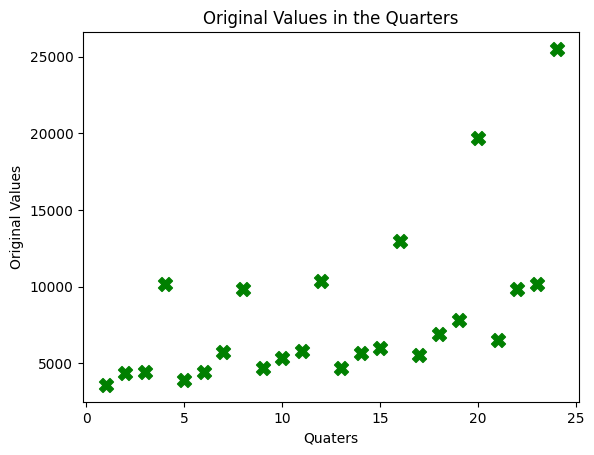

In [12]:
from matplotlib import pyplot as plt

quarters = np.arange(1, 25)

plt.scatter(quarters, original_values, marker = "X", s = 100, c = 'g')

plt.xlabel("Quaters")
plt.ylabel("Original Values")
plt.title("Original Values in the Quarters")

plt.show()

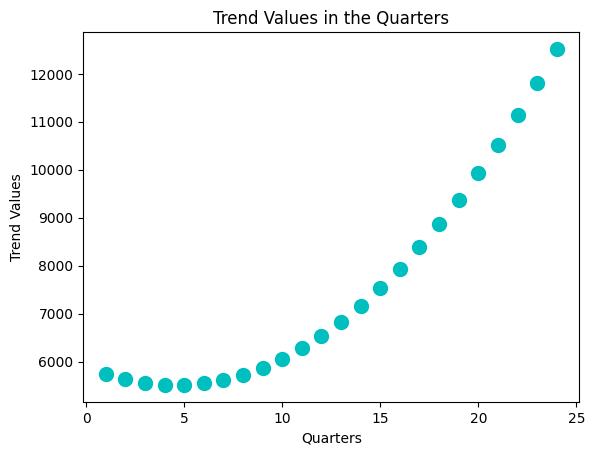

In [13]:
plt.scatter(quarters, trend_values, marker = "o", c = 'c', s = 100)

plt.xlabel("Quarters")
plt.ylabel("Trend Values")
plt.title("Trend Values in the Quarters")

plt.show()

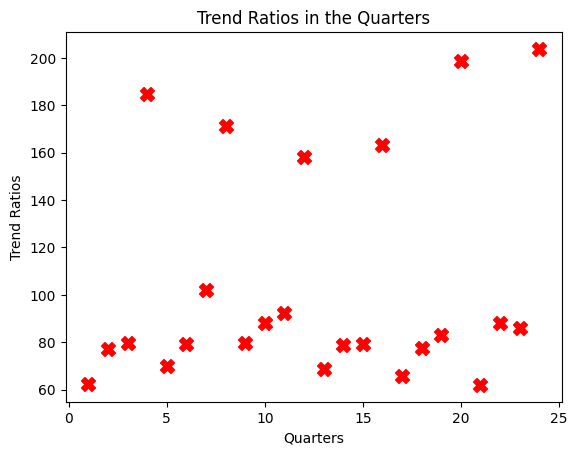

In [14]:
plt.scatter(quarters, trend_ratios, marker = "X", c = 'r', s = 100)

plt.xlabel("Quarters")
plt.ylabel("Trend Ratios")
plt.title("Trend Ratios in the Quarters")

plt.show()